# Instruction

This notebook is a guide for running experiment. 
Please follow the steps below:
1. Add dataset to 'data/'.
   
2. In the Experiment Materials Cell, choose one dataset 'YaleB' or 'ORL', and choose the additive type of noise, including 'Guassian', 'Laplace' and 'Block'.

3. Configure the experiment parameters which can affect experiment results. 

4. Run all cells.

Note
* Images created will be save to 'images/DATASET/K_S_/Algorithm_Noise.png'

* Metrices collected will be recorded to 'metrics/DATASET/K_S_/result.csv'

* Please make sure numpy, matplotlib, PIL, sklearn, pandas, csv packages are installed before running the program

# Experiment Materials

In [1]:
# Dataset Name: 'YaleB', 'ORL'
dataset='YaleB'

# Noise Type: 'Guassian', 'Laplace', 'Block'
noise = 'Block'

# Fitting Algorithms: 'L2NMF', 'L1NMF', 'L1reNMF'
algorithm = 'L1reNMF'

## Parameters

In [2]:
# reduce the size of image
reduce_factor = 5

# the number of component in W and H 
n_component = 40

# the number of round of experiment
n_round = 2

# the percentage of the entire dataset
random_size = 0.1

# max training iteration 
max_iter = 500

# print log period 
print_iter = 100

# path to be saved at
path_name = dataset + '/' + 'K'+str(n_component)+'_S'+str(random_size)


## Experiment

In [3]:
from steps import *


------ Loading YaleB dataset ------
>>Dataset loaded, X_ds: (1254, 2414), y_ds: (2414,), img_size: (33, 38)

------ Sampling 10.0% images randomly ------
>>X: (1254, 241), y: (241,)

------ Adding Block noise to dataset ------
>>Block noise added

------ Fitting L1reNMF algorithm ------
    iter = 100, error = 0.2094745069768387
    iter = 200, error = 0.19709871189420325
    iter = 300, error = 0.19369437824864952
    iter = 400, error = 0.19194367417472927
    iter = 500, error = 0.1907927680816107


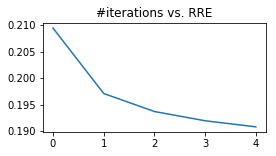


------ Plotting result using L1reNMF ------


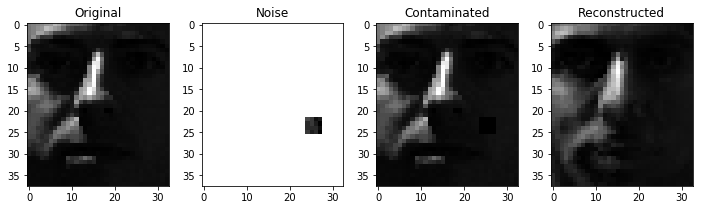


------ Exporting images as BlockYaleB.png ------
>>Directory created as Images/YaleB/K40_S0.1
>>Images saved to Images/YaleB/K40_S0.1/

------ Evaluating performance using L1reNMF ------
>>RRE: 0.20087326326154306, ACC:0.3983402489626556, NMI:0.5842163705482689

------ Saving metrics as BlockYaleB.csv ------
>>Directory created as metrics/YaleB/K40_S0.1


/anaconda2/envs/python3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [4]:
print('\n------ Loading {} dataset ------'.format(dataset))
X_ds, y_ds, img_size = Load_dataset(dataset, reduce_factor)

print('\n------ Sampling {}% images randomly ------'.format(random_size*100))
X, y = Random_samples(X_ds, y_ds, random_size)

print('\n------ Adding {} noise to dataset ------'.format(noise))
X_noisy = Add_noise(X, noise, img_size)

print('\n------ Fitting {} algorithm ------'.format(algorithm))
W, H, time, E = Fit_nmf_model(X_noisy, algorithm, n_component, 
                              iters=max_iter, print_iter=print_iter)

print('\n------ Plotting result using {} ------'.format(algorithm))
X_re = Reconstruct_images(W, H, E)
Visualize_results(X, X_noisy, X_re, img_size)

print('\n------ Exporting images as {}.png ------'.format(noise+dataset))
file_name = algorithm + '_' + noise
Save_images(X, X_noisy, X_re, img_size, file_name, path_name)

print('\n------ Evaluating performance using {} ------'.format(algorithm))
rre, acc, nmi = Evaluate_performance(X, X_re, y, H)

print('\n------ Saving metrics as {}.csv ------'.format(noise+dataset)) 
metrics = [algorithm, noise, rre, acc, nmi, time, max_iter]
Save_metrics(metrics, file_name=noise, path_name=path_name)


In [5]:
# metrics = [algorithm, noise, rre, acc, nmi, time, max_iter]
metrics

['L1reNMF',
 'Block',
 0.20087326326154306,
 0.3983402489626556,
 0.5842163705482689,
 114.89604902267456,
 500]